# PANDAS ile Veri Manipülasyonu

Bu python sayfasındaki içerikler büyük ölçüde VanderPlas 2016 kitabından esinlenilerek hazırlanmıştır.

VanderPlas, Jake. 2016. Python Data Science Handbook: Essential Tools for Working with Data. O'Reilly Media: https://jakevdp.github.io/PythonDataScienceHandbook/

---
## Pandas Objelerine Giriş

In [3]:
import numpy as np
import pandas as pd

Üç temel pandas objesi: Series, DataFrame, ve Index


In [4]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
print(data)

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64


In [42]:
type(data)

pandas.core.series.Series

In [6]:
data.index

RangeIndex(start=0, stop=4, step=1)

In [44]:
data[2]

0.75

In [161]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [34]:
data.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [35]:
type(data.index)

pandas.core.indexes.base.Index

In [165]:
data['b']

0.5

In [11]:
new_data_list = [2, 3.25, 6, 0.75, None]
print(type(new_data_list))
print(new_data_list)

print('\n')

new_data_array = np.array([2, 3.25, 6, 0.75, np.nan])
print(type(new_data_array))
print(new_data_array)

print('\n')

new_data_series = pd.Series(new_data_list)
print(type(new_data_series))
print(new_data_series)

<class 'list'>
[2, 3.25, 6, 0.75, None]


<class 'numpy.ndarray'>
[2.   3.25 6.   0.75  nan]


<class 'pandas.core.series.Series'>
0    2.00
1    3.25
2    6.00
3    0.75
4     NaN
dtype: float64


In [ ]:
sum(new_data_list)

In [12]:
new_data_array.sum()

nan

In [48]:
new_data_series.sum()

12.0

In [49]:
new_data_series.mean()

3.0

In [14]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [20]:
population.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

In [ ]:
population['California':'Florida']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
dtype: int64

In [22]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

In [27]:
states = pd.DataFrame({'population': population,
                       'area': area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [7]:
type(states)

pandas.core.frame.DataFrame

In [11]:
states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

In [12]:
states.columns

Index(['population', 'area'], dtype='object')

In [64]:
print(type(states.index))
print(type(states.columns))

<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.base.Index'>


In [ ]:
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


In [167]:
pd.DataFrame(np.random.rand(3, 2),
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])

,foo,bar
a,0.797719,0.365423
b,0.935187,0.183949
c,0.331858,0.145284


---
Dataframe yaratırken belli Matematiksel işlemleri de kullanabiliriz


In [65]:
counter = []

for i in range(3):
    counter.append(i)

print(counter)

[0, 1, 2]


In [66]:
print([i for i in range(3)])

[0, 1, 2]


In [24]:
data = [{'a': i, 'b': 2 * i} for i in range(3)]

pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


In [8]:
states['population']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
Name: population, dtype: int64

In [27]:
print(type(population))
print(population, end="\n\n")

print(type(area))
print(area)


<class 'pandas.core.series.Series'>
California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

<class 'pandas.core.series.Series'>
California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64


In [32]:
states = pd.DataFrame(population, columns=['population'])
display(states)

states['area'] = area
display(states)

,population
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [ ]:
type(states['area'])

pandas.core.series.Series

---
## Veri İndeksleme ve Filtreleme

In [70]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [171]:
'a' in data

True

In [49]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [73]:
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

In [26]:
data['a']

0.25

In [63]:
data['e'] = 1.25
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

In [64]:
data[['a', 'c', 'e']]

a    0.25
c    0.75
e    1.25
dtype: float64

In [173]:
data['b': 'c']

b    0.50
c    0.75
dtype: float64

In [25]:
data[(data > 0.3) & (data < 0.8)]

b    0.50
c    0.75
dtype: float64

In [175]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [68]:
data.keys()

Index(['area', 'pop'], dtype='object')

In [83]:
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [177]:
data.loc['New York']

area      141297
pop     19651127
Name: New York, dtype: int64

In [29]:
data.loc['New York','area']

141297

In [89]:
data.loc['Texas':'Florida', 'area':'pop']

,area,pop
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860


In [32]:
data.loc[:'New York', :'area']

,area
California,423967
Texas,695662
New York,141297


In [ ]:
data.loc[:,'area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [93]:
data.iloc[0,0]

423967

In [107]:
data.iloc[:3, :2]

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [31]:
data.values

array([[  423967, 38332521],
       [  695662, 26448193],
       [  141297, 19651127],
       [  170312, 19552860],
       [  149995, 12882135]], dtype=int64)

In [182]:
data.T

,California,Texas,New York,Florida,Illinois
area,423967,695662,141297,170312,149995
pop,38332521,26448193,19651127,19552860,12882135


In [33]:
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [ ]:
data.loc[data.density > 100, ['pop', 'density']]

,pop,density
New York,19651127,139.076746
Florida,19552860,114.806121


In [41]:
data[data["density"] > 100]

,area,pop,density
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121


In [42]:
data.iloc[0, 2] = 90
data

,area,pop,density
California,423967,38332521,90.000000
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


---
## Pandas'ta Temel Veri Operasyonları

In [46]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0, 10, 4))
ser

0    6
1    3
2    7
3    4
dtype: int32

In [52]:
rng = np.random.RandomState(42)
df = pd.DataFrame(rng.randint(0, 10, (3, 4)),
                  columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,6,3,7,4
1,6,9,2,6
2,7,4,3,7


In [53]:
np.exp(ser)

0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64

In [115]:
np.sin(df * np.pi / 4)

,A,B,C,D
0,-1.000000,7.071068e-01,1.000000,-1.000000e+00
1,-0.707107,1.224647e-16,0.707107,-7.071068e-01
2,-0.707107,1.000000e+00,-0.707107,1.224647e-16


In [47]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
                  'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193,
                        'New York': 19651127}, name='population')

In [48]:
population / area

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

In [ ]:
area.index.union(population.index) 

Index(['Alaska', 'California', 'New York', 'Texas'], dtype='object')

In [50]:
area.index.intersection(population.index)

Index(['Texas', 'California'], dtype='object')

In [59]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
A + B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

In [57]:
A.add(B, fill_value=0)

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

In [69]:

A = pd.DataFrame(rng.randint(0, 20, (2, 2)),
                 columns=list('AB'))
A

,A,B
0,11,7
1,14,2


In [67]:
B = pd.DataFrame(rng.randint(0, 10, (3, 3)),
                 columns=list('BAC'))
B

,B,A,C
0,8,1,9
1,8,9,4
2,1,3,6


In [71]:
A + B

,A,B,C
0,12.0,15.0,NaN
1,23.0,10.0,NaN
2,NaN,NaN,NaN


In [74]:
fill = A.stack().mean()
print(fill)
A.add(B, fill_value=fill)

8.5


,A,B,C
0,12.0,15.0,17.5
1,23.0,10.0,12.5
2,11.5,9.5,14.5


#### Python Operatörleri:
- "+" add()
- "-" sub(), subtract()
- "*" mul(), multiply()
- "/" truediv(), div(), divide()
- "//" floordiv()
- "%" mod()
- "**" pow()

In [79]:
A = rng.randint(10, size=(3, 4))
A

array([[0, 3, 1, 7],
       [3, 1, 5, 5],
       [9, 3, 5, 1]])

In [58]:
type(A)

numpy.ndarray

In [59]:
A[0]

array([3, 8, 2, 4])

In [60]:
A - A[0]

array([[ 0,  0,  0,  0],
       [-1, -2,  2,  4],
       [ 3, -7,  1,  4]])

In [83]:
df = pd.DataFrame(A, columns=list('QRST'))
df

,Q,R,S,T
0,0,3,1,7
1,3,1,5,5
2,9,3,5,1


In [62]:
df - df.iloc[0]

,Q,R,S,T
0,0,0,0,0
1,-1,-2,2,4
2,3,-7,1,4


In [87]:
df.subtract(df['R'])

,Q,R,S,T,0,1,2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Kayıp, Eksik (Missing) Veri

In [65]:
vals1 = np.array([1, None, 3, 4])
vals1

array([1, None, 3, 4], dtype=object)

In [66]:
for i in ['object', 'int']:
    print("dtype =", i)
    %timeit np.arange(1E6, dtype=i).sum()
    print()

dtype = object
170 ms ± 5.68 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

dtype = int
5.37 ms ± 757 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)



In [67]:
x = 1E6
x*1E-3

1000.0

In [68]:
x = 5
y = 3

%timeit z = x + y
print()

x = 5.0
y = 3.0

%timeit z = x + y
print()

x = 'ahmet'
y = 'mehmet'

%timeit z = x + y
print()

78.7 ns ± 4 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)

80.6 ns ± 8.43 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)

174 ns ± 7.89 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)



In [69]:
vals1.sum()

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

In [70]:
vals2 = np.array([1, np.nan, 3, 4]) 
vals2.dtype

dtype('float64')

In [71]:
1 + np.nan

nan

In [72]:
0 *  np.nan

nan

In [73]:
vals2.sum(), vals2.min(), vals2.max()

(nan, nan, nan)

In [74]:
np.nansum(vals2), np.nanmin(vals2), np.nanmax(vals2)

(8.0, 1.0, 4.0)

In [75]:
pd.Series([1, np.nan, 2, None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

In [89]:
x = pd.Series(range(2),  dtype=int)
x

0    0
1    1
dtype: int32

In [77]:
x[0] = None
x

0    NaN
1    1.0
dtype: float64

In [105]:
data = pd.Series([1, np.nan, 'hello', None, 5])

In [79]:
data

0        1
1      NaN
2    hello
3     None
4        5
dtype: object

In [80]:
type(data.iloc[0])

int

In [96]:
data.isnull()

0    False
1     True
2    False
3     True
4    False
dtype: bool

In [82]:
data[data.notnull()]

0        1
2    hello
4        5
dtype: object

In [107]:
data = data.dropna()

In [108]:
data

0        1
2    hello
4        5
dtype: object

In [114]:
df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,      6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [86]:
df.dropna()

,0,1,2
1,2.0,3.0,5


In [115]:
df.dropna(axis=1)

,2
0,2
1,5
2,6


In [116]:
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [117]:
df.dropna(axis='rows', how='all')

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [90]:
df.dropna(axis='rows', how='any')

,0,1,2,3


In [91]:
df.dropna(axis='rows', thresh=3)

,0,1,2,3
1,2.0,3.0,5,NaN


In [92]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [93]:
data.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [94]:
# forward-fill
data.fillna(method='ffill')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [95]:
# back-fill
data.fillna(method='bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

In [96]:
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [97]:
df.fillna(method='ffill', axis=1)

,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


---
## Hiyerarşik İndeksleme

In [1]:
import pandas as pd
import numpy as np

In [26]:
# the bad way of multi indexed series

index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]
pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [3]:
pop[('California', 2010):('Texas', 2000)]

(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
dtype: int64

In [4]:
pop.index[0][1]

2000

In [5]:
for i in pop.index:
    if i[1] == 2010:
        print(i[0] ,pop[i])

California 37253956
New York 19378102
Texas 25145561


In [6]:
pop[[i for i in pop.index if i[1] == 2000]]

(California, 2000)    33871648
(New York, 2000)      18976457
(Texas, 2000)         20851820
dtype: int64

In [7]:
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [8]:
pop[('California', 2000)]

33871648

In [9]:
pop[:, 2000]

KeyError: 'key of type tuple not found and not a MultiIndex'

---
Daha iyi bir yol: Pandas MultiIndex

In [63]:
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex([('California', 2000),
            ('California', 2010),
            (  'New York', 2000),
            (  'New York', 2010),
            (     'Texas', 2000),
            (     'Texas', 2010)],
           )

In [55]:
type(index)

pandas.core.indexes.multi.MultiIndex

In [64]:
pop = pop.reindex(index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [13]:
pop["California", :]

2000    33871648
2010    37253956
dtype: int64

In [14]:
pop[: , 2000]


California    33871648
New York      18976457
Texas         20851820
dtype: int64

In [18]:
pop["California", 2000]


33871648

In [20]:
pop[('California', 2010):('Texas', 2000)]

California  2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
dtype: int64

In [66]:
pop2 = pop.copy()
pop2.index.names = ['state', 'year']
pop2

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

Explicit MultiIndex constructors

In [ ]:
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [ ]:
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [ ]:
pd.MultiIndex.from_product([['a', 'b','c','d'], range(1990,1994)])

MultiIndex([('a', 1990),
            ('a', 1991),
            ('a', 1992),
            ('a', 1993),
            ('b', 1990),
            ('b', 1991),
            ('b', 1992),
            ('b', 1993),
            ('c', 1990),
            ('c', 1991),
            ('c', 1992),
            ('c', 1993),
            ('d', 1990),
            ('d', 1991),
            ('d', 1992),
            ('d', 1993)],
           )

## Multi-Index DataFrame

In [70]:
pd.DataFrame(pop, columns = ["population"])

population
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561

---
#### Stacking (İstifleme) vs Unstacking (Geri Açma)

In [78]:
pop_df = pop.unstack()
pop_df
#from long to wide in Stata

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [83]:
pop_df2 = pop_df.stack()
pop_df2

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [90]:
print(type(pop))
print(type(pop.unstack()))
print(type(pop.unstack().stack()))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [34]:
pop_df = pd.DataFrame({'total': pop,
                       'under18': [9267089, 9284094,
                                   4687374, 4318033,
                                   5906301, 6879014]})
pop_df

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

In [35]:
pop_df["f_u18"] = round((pop_df['under18'] / pop_df['total'])*100,2)

In [49]:
pop_df

total  under18  f_u18
California 2000  33871648  9267089  27.36
           2010  37253956  9284094  24.92
New York   2000  18976457  4687374  24.70
           2010  19378102  4318033  22.28
Texas      2000  20851820  5906301  28.33
           2010  25145561  6879014  27.36

In [42]:
pop_df.unstack()

total            under18           f_u18       
                2000      2010     2000     2010   2000   2010
California  33871648  37253956  9267089  9284094  27.36  24.92
New York    18976457  19378102  4687374  4318033  24.70  22.28
Texas       20851820  25145561  5906301  6879014  28.33  27.36

In [77]:
pop_df.stack()

state       year         
California  2000  total      33871648.00
                  under18     9267089.00
                  f_u18            27.36
            2010  total      37253956.00
                  under18     9284094.00
                  f_u18            24.92
New York    2000  total      18976457.00
                  under18     4687374.00
                  f_u18            24.70
            2010  total      19378102.00
                  under18     4318033.00
                  f_u18            22.28
Texas       2000  total      20851820.00
                  under18     5906301.00
                  f_u18            28.33
            2010  total      25145561.00
                  under18     6879014.00
                  f_u18            27.36
dtype: float64

In [29]:
pop.unstack(level=1)

year,2000,2010
state,,
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [30]:
pop.unstack(level=0)


state,California,New York,Texas
year,,,
2000,33871648,18976457,20851820
2010,37253956,19378102,25145561


In [33]:
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [32]:
pop_flat = pop.reset_index(name='population')
pop_flat

,state,year,population
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20851820
5,Texas,2010,25145561


In [127]:
pop_flat.set_index(['state', 'year'])

population
state      year            
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561

---
## Farklı Verisetlerini Birleştirme: Concat

In [91]:
import pandas as pd
import numpy as np

In [96]:
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
np.concatenate([x, y, z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [100]:
x = [[1, 2],
     [3, 4]]
np.concatenate([x, x], axis=1) 

array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

In [58]:
np.shape(x)

(2, 2)

In [113]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [102]:
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind] for c in cols}
    return pd.DataFrame(data, ind)

# example DataFrame
make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In [111]:
#different observations, same features
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
display(df1, df2, pd.concat([df1, df2], axis = 0))

,A,B
1,A1,B1
2,A2,B2


,A,B
3,A3,B3
4,A4,B4


,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


In [64]:
#different features, same observations (a more common case while working with real life data)
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])
display(df3, df4, pd.concat([df3, df4], axis=1))

,A,B
0,A0,B0
1,A1,B1


,C,D
0,C0,D0
1,C1,D1


,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1


## Merge ve Join Fonksiyonları

In [115]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
display(df1, df2)

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [116]:
df_temp = pd.concat([df1, df2], axis=1)
df_temp

,employee,group,employee,hire_date
0,Bob,Accounting,Lisa,2004
1,Jake,Engineering,Bob,2008
2,Lisa,Engineering,Jake,2012
3,Sue,HR,Sue,2014


In [ ]:
#One-to-one
df3 = pd.merge(df1, df2)
df3

#The pd.merge() function recognizes that each DataFrame has an "employee" column, and automatically joins using this column as a key. 

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [140]:
#Many-to-one
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
display(df3, df4, pd.merge(df3, df4))

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


,group,supervisor
0,Accounting,Carly
1,Engineering,Guido
2,HR,Steve


,employee,group,hire_date,supervisor
0,Bob,Accounting,2008,Carly
1,Jake,Engineering,2012,Guido
2,Lisa,Engineering,2004,Guido
3,Sue,HR,2014,Steve


In [122]:
#Many-to-many
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
display(df1, df5, pd.merge(df1, df5))

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets
5,HR,organization


,employee,group,skills
0,Bob,Accounting,math
1,Bob,Accounting,spreadsheets
2,Jake,Engineering,coding
3,Jake,Engineering,linux
4,Lisa,Engineering,coding
5,Lisa,Engineering,linux
6,Sue,HR,spreadsheets
7,Sue,HR,organization


#### Anahtar bir merge değişkeni tarifleme

In [119]:
display(df1, df2, pd.merge(df1, df2, on='employee'))

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [124]:
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [3, 1, 4, 2]})
display(df8, df9, pd.merge(df8, df9, on="rank"))

,name,rank
0,Bob,1
1,Jake,2
2,Lisa,3
3,Sue,4


,name,rank
0,Bob,3
1,Jake,1
2,Lisa,4
3,Sue,2


,name_x,rank,name_y
0,Bob,1,Jake
1,Jake,2,Sue
2,Lisa,3,Bob
3,Sue,4,Lisa


In [ ]:
display(df8, df9, pd.merge(df8, df9, on="name", suffixes=["_speed", "_accuracy"]))

,name,rank
0,Bob,1
1,Jake,2
2,Lisa,3
3,Sue,4


,name,rank
0,Bob,3
1,Jake,1
2,Lisa,4
3,Sue,2


,name,rank_speed,rank_accuracy
0,Bob,1,3
1,Jake,2,1
2,Lisa,3,4
3,Sue,4,2


In [135]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})
display(df1, df3, pd.merge(df1, df3, left_on="employee", right_on="name"))

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


,name,salary
0,Bob,70000
1,Jake,80000
2,Lisa,120000
3,Sue,90000


,employee,group,name,salary
0,Bob,Accounting,Bob,70000
1,Jake,Engineering,Jake,80000
2,Lisa,Engineering,Lisa,120000
3,Sue,HR,Sue,90000


In [129]:
pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


In [131]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
display(df1a, df2a)

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR


,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012
Sue,2014


In [141]:
display(df1a, df2,
        pd.merge(df1a, df2a, left_index=True, right_index=True))

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR


,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


In [147]:
pd.merge(df1a, df2a, left_index=True, right_index=True).reset_index()

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


Specifying Set Arithmetic for Joins

In [142]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['coke', 'lemonade']},
                   columns=['name', 'drink'])
display(df6, df7, pd.merge(df6, df7))

,name,food
0,Peter,fish
1,Paul,beans
2,Mary,bread


,name,drink
0,Mary,coke
1,Joseph,lemonade


,name,food,drink
0,Mary,bread,coke


In [86]:
pd.merge(df6, df7, how='inner')

,name,food,drink
0,Mary,bread,coke


In [87]:
display(df6, df7, pd.merge(df6, df7, how='outer'))

,name,food
0,Peter,fish
1,Paul,beans
2,Mary,bread


,name,drink
0,Mary,coke
1,Joseph,lemonade


,name,food,drink
0,Joseph,NaN,lemonade
1,Mary,bread,coke
2,Paul,beans,NaN
3,Peter,fish,NaN


In [150]:
display(df6, df7, pd.merge(df6, df7, how='left'))

,name,food
0,Peter,fish
1,Paul,beans
2,Mary,bread


,name,drink
0,Mary,coke
1,Joseph,lemonade


,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,coke


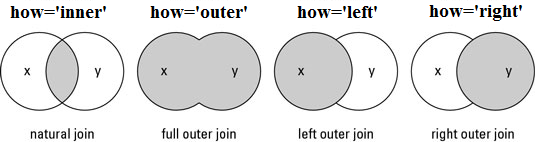

## Çökertme - Gruplama (Aggregation and Grouping)

Büyük veriyi analiz etmenin temel adımlarından biri, veriyi verimli bir şekilde özetlemektir. Yani, toplam (sum()), ortalama (mean()), medyan (median()), en küçük (min()) ve en büyük (max()) gibi işlemlerle, büyük olabilecek bir veri kümesinin yapısını tek bir sayıyla anlamaya çalışırız. Bu bölümde, Pandas’ta özetleme (aggregation) işlemlerini inceleyeceğiz: NumPy dizilerinde gördüğümüz basit işlemlere benzeyen örneklerden, groupby kavramına dayalı daha gelişmiş yöntemlere kadar.

In [151]:
import numpy as np
import pandas as pd

In [155]:
# pip install seaborn

In [152]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [ ]:
# keşif metodu, keşfedilen gezegen sayısı, yılıdızı etrafında bir tur tamamlama gün sayısı/süresi, kütle, dünyadan uzaklığı, keşefedildiği yıl  
planets.head(10)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009
5,Radial Velocity,1,185.840,4.80,76.39,2008
6,Radial Velocity,1,1773.400,4.64,18.15,2002
7,Radial Velocity,1,798.500,NaN,21.41,1996
8,Radial Velocity,1,993.300,10.30,73.10,2008
9,Radial Velocity,2,452.800,1.99,74.79,2010


In [154]:
rng = np.random.RandomState(42)

In [155]:
type(rng)

numpy.random.mtrand.RandomState

In [156]:
ser = pd.Series(rng.rand(5))
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [157]:
ser.sum()

2.811925491708157

In [158]:
ser.mean()

0.5623850983416314

In [159]:
df = pd.DataFrame({'A': rng.rand(5),
                   'B': rng.rand(5)})
df

,A,B
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


In [160]:
df.mean()

A    0.477888
B    0.443420
dtype: float64

In [168]:
df.mean(axis=0) #instead of 'columns', just write 1

A    0.477888
B    0.443420
dtype: float64

In [172]:
df.describe()

,A,B
count,5.000000,5.000000
mean,0.477888,0.443420
std,0.353125,0.426952
min,0.058084,0.020584
25%,0.155995,0.181825
50%,0.601115,0.212339
75%,0.708073,0.832443
max,0.866176,0.969910


In [166]:
planets.dropna().describe().T

,count,mean,std,min,25%,50%,75%,max
number,498.0,1.734940,1.175720,1.0000,1.00000,1.000,2.0000,6.0
orbital_period,498.0,835.778671,1469.128259,1.3283,38.27225,357.000,999.6000,17337.5
mass,498.0,2.509320,3.636274,0.0036,0.21250,1.245,2.8675,25.0
distance,498.0,52.068213,46.596041,1.3500,24.49750,39.940,59.3325,354.0
year,498.0,2007.377510,4.167284,1989.0000,2005.00000,2009.000,2011.0000,2014.0


### GroupBy: Böl, Uygula, Birleştir

In [217]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [168]:
df.groupby('key')

In [169]:
df.groupby('key').mean()

,data
key,
A,1.5
B,2.5
C,3.5


In [170]:
planets.groupby('method')

In [171]:
planets.groupby('method')['orbital_period']

In [ ]:
planets['orbital_period'].median()

2002.9175960947582

In [178]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [174]:
planets.groupby('method')['orbital_period'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,631.180000,544.217663,246.360000,438.770000,631.180000,823.590000,1016.000000
Eclipse Timing Variations,9.0,4751.644444,2499.130945,1916.250000,2900.000000,4343.500000,5767.000000,10220.000000
Imaging,12.0,118247.737500,213978.177277,4639.150000,8343.900000,27500.000000,94250.000000,730000.000000
Microlensing,7.0,3153.571429,1113.166333,1825.000000,2375.000000,3300.000000,3550.000000,5100.000000
Orbital Brightness Modulation,3.0,0.709307,0.725493,0.240104,0.291496,0.342887,0.943908,1.544929
Pulsar Timing,5.0,7343.021201,16313.265573,0.090706,25.262000,66.541900,98.211400,36525.000000
Pulsation Timing Variations,1.0,1170.000000,NaN,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000
Radial Velocity,553.0,823.354680,1454.926210,0.736540,38.021000,360.200000,982.000000,17337.500000
Transit,397.0,21.102073,46.185893,0.355000,3.160630,5.714932,16.145700,331.600590


Aggregate, filter, transform, apply

In [180]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [193]:
df.groupby('key').min()

,data1,data2
key,,
A,0,3
B,1,0
C,2,3


In [182]:
#aggregation returns some reduced version of data
df.groupby('key').aggregate([np.min, np.mean, np.max])

C:\Users\reyta\AppData\Local\Temp\ipykernel_11160\233634618.py:2: FutureWarning: The provided callable <function min at 0x00000192161D5D00> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  df.groupby('key').aggregate([np.min, np.mean, np.max])
C:\Users\reyta\AppData\Local\Temp\ipykernel_11160\233634618.py:2: FutureWarning: The provided callable <function mean at 0x00000192161D65C0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('key').aggregate([np.min, np.mean, np.max])
C:\Users\reyta\AppData\Local\Temp\ipykernel_11160\233634618.py:2: FutureWarning: The provided callable <function max at 0x00000192161D5BC0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep c

data1          data2         
      min mean max   min mean max
key                              
A       0  1.5   3     3  4.0   5
B       1  2.5   4     0  3.5   7
C       2  3.5   5     3  6.0   9

In [189]:
#aggregation returns some reduced version of data
df.groupby('key').aggregate(['min', 'mean', 'max'])

data1     data2    
      min max   min max
key                    
A       0   3     3   5
B       1   4     0   7
C       2   5     3   9

In [190]:
df.groupby('key').aggregate({'data1': 'min',
                             'data2': 'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


In [ ]:
# groupby().filter() bool dönen bir fonksiyonu input olarak alır
def asd(x):
    return x['data2'].std() > 4

display(df, df.groupby('key').std(), df.groupby('key').filter(asd))

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


,data1,data2
key,,
A,2.12132,1.414214
B,2.12132,4.949747
C,2.12132,4.242641


,key,data1,data2
1,B,1,0
2,C,2,3
4,B,4,7
5,C,5,9


While aggregation must return a reduced version of the data, transformation can return some transformed version of the full data to recombine. For such a transformation, the output is the same shape as the input. A common example is to center the data by subtracting the group-wise mean:

In [179]:
##transformation returns transformed version of data

display(df, df.groupby('key').mean(), df.groupby('key').transform(lambda x: x - x.mean()))

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


,data1,data2
key,,
A,1.5,4.0
B,2.5,3.5
C,3.5,6.0


,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


A lambda function in python is a small anonymous function that can take any number of arguments and execute an expression.

In [180]:
df['data2'].sum()

27

In [198]:
def norm_by_data2(x):
    # x is a DataFrame of group values
    x['data1'] =  x['data1']  / x['data2'].sum()
    return x

display(df, df.groupby('key').apply(norm_by_data2))

C:\Users\reyta\AppData\Local\Temp\ipykernel_11160\3191449899.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  display(df, df.groupby('key').apply(norm_by_data2))


,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


key     data1  data2
key                       
A   0   A  0.000000      5
    3   A  0.375000      3
B   1   B  0.142857      0
    4   B  0.571429      7
C   2   C  0.166667      3
    5   C  0.416667      9

In [223]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [ ]:
#df["L"] = L 

In [224]:
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [225]:
L = [0, 1, 0, 1, 1, 0]

display(df, df.groupby(L).sum())

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


,key,data1,data2
0,ACC,7,17
1,BAB,8,10


In [186]:
display(df, df.groupby(df['key']).sum())

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


,data1,data2
key,,
A,3,8
B,5,7
C,7,12


In [226]:
df2 = df.set_index('key')
mapping = {'A': 'ünlü harf', 'B': 'ünsüz harf', 'C': 'ünsüz harf'}
display(df2, df2.groupby(mapping).sum())

,data1,data2
key,,
A,0,5
B,1,0
C,2,3
A,3,3
B,4,7
C,5,9


,data1,data2
key,,
ünlü harf,3,8
ünsüz harf,12,19


In [ ]:
#Eğer by parametresi callable (fonksiyon) ise pandas bu fonksiyonu index’e uygular
display(df2, df2.groupby(str.lower).mean())

,data1,data2
key,,
A,0,5
B,1,0
C,2,3
A,3,3
B,4,7
C,5,9


,data1,data2
key,,
a,1.5,4.0
b,2.5,3.5
c,3.5,6.0


In [189]:
df2.groupby([str.lower, mapping]).mean()

,,data1,data2
key,key,,
a,ünlü harf,1.5,4.0
b,ünsüz harf,2.5,3.5
c,ünsüz harf,3.5,6.0


#### Multi-Indeks ile Guruplama / Çökertme


In [248]:
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [ ]:
pop.groupby(level='state').mean()


year
2000    2.456664e+07
2010    2.725921e+07
dtype: float64

In [247]:
pop.groupby(level='year').mean()

year
2000    2.456664e+07
2010    2.725921e+07
dtype: float64

#### Gruplama uygulaması

Bunun bir örneği olarak, birkaç satır Python kodunda tüm bunları bir araya getirip keşfedilen gezegenleri yönteme ve on yıla göre sayabiliriz:

In [234]:
planets

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [235]:
decade = 10 * (planets['year'] // 10) # rounded down to the nearest whole number

In [236]:
decade = decade.astype(str) + 's'
decade

0       2000s
1       2000s
2       2010s
3       2000s
4       2000s
        ...  
1030    2000s
1031    2000s
1032    2000s
1033    2000s
1034    2000s
Name: year, Length: 1035, dtype: object

In [237]:
type(decade)

pandas.core.series.Series

In [238]:
planets['decade']=decade
planets

,method,number,orbital_period,mass,distance,year,decade
0,Radial Velocity,1,269.300000,7.10,77.40,2006,2000s
1,Radial Velocity,1,874.774000,2.21,56.95,2008,2000s
2,Radial Velocity,1,763.000000,2.60,19.84,2011,2010s
3,Radial Velocity,1,326.030000,19.40,110.62,2007,2000s
4,Radial Velocity,1,516.220000,10.50,119.47,2009,2000s
...,...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006,2000s
1031,Transit,1,2.615864,NaN,148.00,2007,2000s
1032,Transit,1,3.191524,NaN,174.00,2007,2000s
1033,Transit,1,4.125083,NaN,293.00,2008,2000s


In [239]:
#planets.groupby('method')['number'].sum()

In [240]:
planets.groupby(['method','decade'])['number'].sum()

method                         decade
Astrometry                     2010s       2
Eclipse Timing Variations      2000s       5
                               2010s      10
Imaging                        2000s      29
                               2010s      21
Microlensing                   2000s      12
                               2010s      15
Orbital Brightness Modulation  2010s       5
Pulsar Timing                  1990s       9
                               2000s       1
                               2010s       1
Pulsation Timing Variations    2000s       1
Radial Velocity                1980s       1
                               1990s      52
                               2000s     475
                               2010s     424
Transit                        2000s      64
                               2010s     712
Transit Timing Variations      2010s       9
Name: number, dtype: int64

In [244]:
planets.groupby(['method', 'decade'])['number'].sum().unstack()

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,NaN,NaN,NaN,2.0
Eclipse Timing Variations,NaN,NaN,5.0,10.0
Imaging,NaN,NaN,29.0,21.0
Microlensing,NaN,NaN,12.0,15.0
Orbital Brightness Modulation,NaN,NaN,NaN,5.0
Pulsar Timing,NaN,9.0,1.0,1.0
Pulsation Timing Variations,NaN,NaN,1.0,NaN
Radial Velocity,1.0,52.0,475.0,424.0
Transit,NaN,NaN,64.0,712.0


In [243]:
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

year,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0
